<a href="https://colab.research.google.com/github/kaushalkumawat77/DistilBERT-NLP/blob/main/DistilBERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hugging face:-it is a platform, it provides pre trained models, based on nlp applications(speech or non-speech).
#LMs vs LLMs:- lm is language model and (LLM is large language model to trained huge amount of data.)
#BERT:- pre trained models it use encoders or decoders.
#DISTILBERT:- it works on small model,used for learning purpose,it gives score automatically based on subjectivity or polarity.
#transformers :-used for parallel processing
#wordcloud

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install wordcloud matplotlib
!matplotlib inline

/bin/bash: line 1: matplotlib: command not found


In [ ]:
#load csv file into a dataframe without header
df=pd.read_csv('/content/feedback_data.csv',header=None)

In [ ]:
df.head()

,0,1
0,Your products are excellent. I really love the...,delivery to my location in Los Angeles was a ...
1,The customer service team in New York was help...,NaN
2,The new features in the latest release are fan...,NaN
3,The product didn't meet my expectations,and I'm disappointed. I hope you can address ...
4,Your products are excellent. I really love the...,NaN


In [ ]:
from transformers import pipeline,DistilBertModel,DistilBertTokenizer

#load pre-trained DistilBert model and tokenizer
model=DistilBertModel.from_pretrained('distilbert-base-uncased')
tokenizer=DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
sentiment_analysis_bert=pipeline("sentiment-analysis", model='nlptown/bert-base-multilingual-uncased-sentiment')

sentiment_results_bert=[]
for index, row in df.iterrows():
  text=row[0]
  bert_result=sentiment_analysis_bert(text)[0]
  sentiment_label_bert=bert_result['label']
  sentiment_score_bert=bert_result['score']
  sentiment_results_bert.append({"Text":text,"Sentiment score": sentiment_score_bert, "Sentiment label":sentiment_label_bert})

  for result in sentiment_results_bert:
    print(f"Text:{result['Text']}")
    print(f"Sentimnet score:{result['Sentiment score']}")
    print(f"Sentiment label:{result['Sentiment label']}")
    print()

    sentiment_df_bert=pd.DataFrame(sentiment_results_bert)
    sentiment_df_bert.to_csv("sentiment_results_bert.csv",index=False)


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Streaming output truncated to the last 5000 lines.
Text:Your products are excellent. I really love the quality! However, delivery to my location in Boston was a bit slow. johnny@example.com
Sentimnet score:0.6344711184501648
Sentiment label:4 stars

Text:The customer service team in Miami was helpful in resolving my issue. I appreciate the assistance. sarah@example.com
Sentimnet score:0.5475798845291138
Sentiment label:4 stars

Text:The new features in the latest release are fantastic! They have greatly improved the user experience in Seattle.
Sentimnet score:0.8473469614982605
Sentiment label:5 stars

Text:The product didn't meet my expectations and I'm disappointed. I hope you can address the issues in Denver. My email address is tommy@example.com
Sentimnet score:0.5559889674186707
Sentiment label:2 stars

Text:Your products are excellent. I really love the quality! However, delivery to my location in Dallas was a bit slow. anna@example.com
Sentimnet score:0.6438484191894531
Sentimen

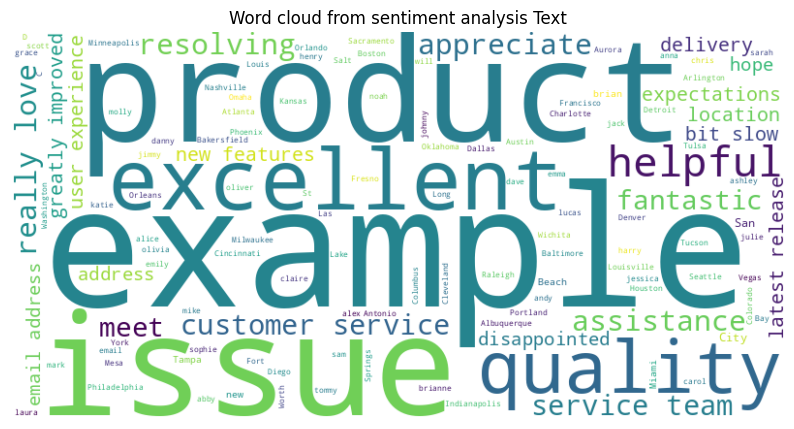

In [ ]:
from wordcloud import WordCloud

text_combined=' '.join(sentiment_df_bert['Text'])

wordcloud =WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_combined)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud from sentiment analysis Text')
plt.show()




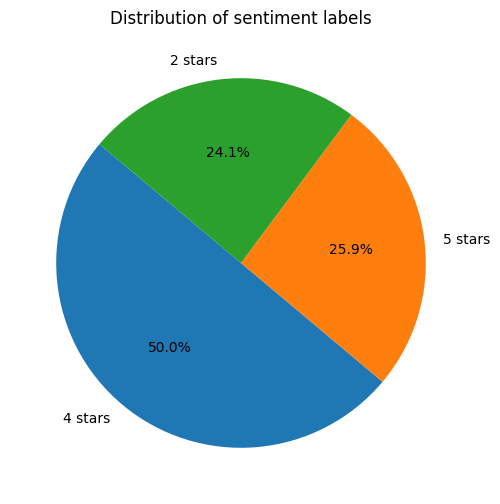

In [ ]:
sentiment_label_counts=sentiment_df_bert['Sentiment label'].value_counts()

plt.figure(figsize=(8,6))
plt.pie(sentiment_label_counts, labels=sentiment_label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of sentiment labels')
plt.show()

PEFT:- stands for parameter-Efficient fine tuning.

fine tuning:- used to find data on pre trained model based on your requirement, we don't need to find a tuning on all
